In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import nltk
nltk.download('stopwords')
nltk.download('punkt')

reviews= reviews = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2024-01-08/data/reviews.csv.gz")

# RQ1: Linguistic Patterns and Keywords in Guest Reviews

In [ ]:
from nltk.tokenize import word_tokenize
import string

# Function to clean text data
def clean_text(text):
  #convert text to lowercase
  text=text.lower()
  text=text.translate(str.maketrans('', '', string.punctuation))
  stop_words=set(stopwords.words('english'))
  words=word_tokenize(text)
  filtered_text=' '.join([word for word in words if word not in stop_words])
  return filtered_text

# Clean the comments column
reviews['cleaned_comments'] = reviews['comments'].astype(str).apply(clean_text)

In [ ]:
# Perform sentiment analysis

reviews['polarity'] = reviews['cleaned_comments'].apply(lambda x: TextBlob(x).sentiment.polarity)
reviews['sentiment'] = reviews['polarity'].apply(lambda x: 'positive' if x>0 else 'negative')

<ipython-input-11-2587fc9570a4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=reviews, palette='coolwarm')


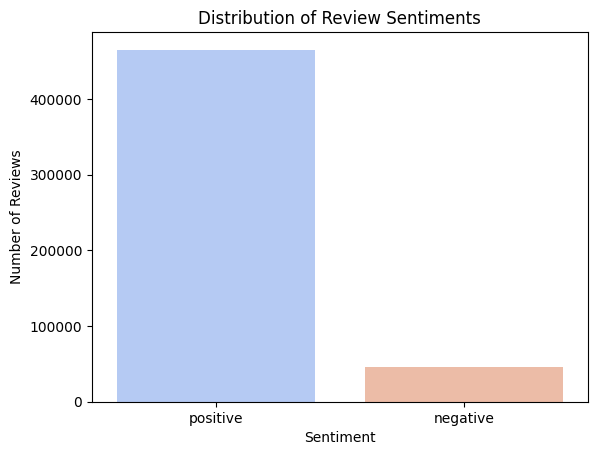

In [ ]:
# visualizing sentiment distribution

import seaborn as sns

# Plotting the distribution of sentiments
sns.countplot(x='sentiment', data=reviews, palette='coolwarm')
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
def get_top_words(text_series, n=20):
    cv = CountVectorizer(stop_words='english')  # Initialize the CountVectorizer
    X = cv.fit_transform(text_series)  # Fit and transform the text data to a word frequency array
    sum_words = X.sum(axis=0)  # Sum word occurrences
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]  # Pair words with their frequencies
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)  # Sort words by frequency
    return words_freq[:n]  # Return top n words

positive_reviews = reviews[reviews['sentiment'] == 'positive']['cleaned_comments']
negative_reviews = reviews[reviews['sentiment'] == 'negative']['cleaned_comments']
top_positive_words = get_top_words(positive_reviews)
top_negative_words = get_top_words(negative_reviews)

In [ ]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,cleaned_comments,polarity,sentiment
0,1419,38924112,2015-07-19,11308465,Marcela,Having the opportunity of arriving to Alexandr...,opportunity arriving alexandras house describe...,0.486905,positive
1,1419,44791978,2015-08-29,9580285,Marco,We have no enough words to describe how beauty...,enough words describe beautyful cozy alexandra...,0.166667,positive
2,1419,45957133,2015-09-07,38394721,Andrea,The listing was exceptional and an even better...,listing exceptional even better experience per...,0.598485,positive
3,1419,67295154,2016-03-28,3515044,Shaun,Alexandra's home was amazing and in such a nea...,alexandras home amazing neat neighbourhood eve...,0.371429,positive
4,1419,177702208,2017-08-03,13987100,Kate,Beautiful home. Very comfortable and clean. Pe...,beautiful home comfortable clean perfect famil...,0.486296,positive


<ipython-input-12-1f283fa06d4a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


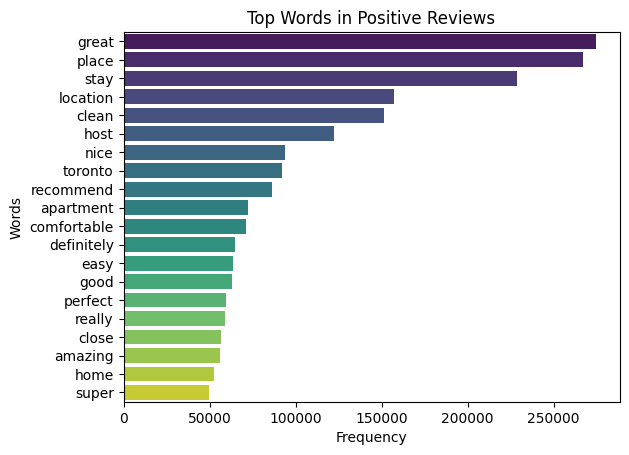

<ipython-input-12-1f283fa06d4a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


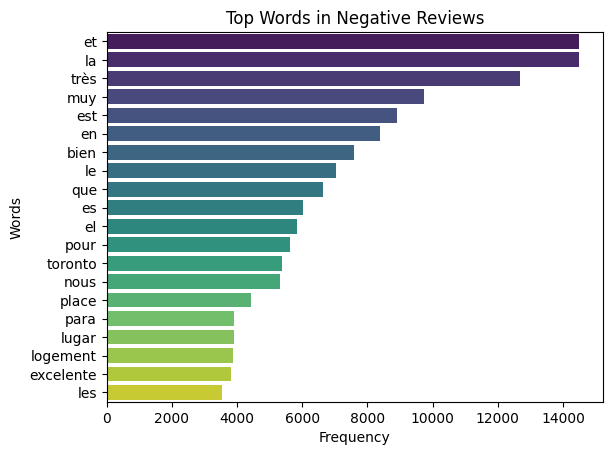

In [ ]:
# visualizing top words in positive and negative reviews

# Function to plot top words
def plot_top_words(top_words, title):
    words = [word[0] for word in top_words]
    counts = [word[1] for word in top_words]
    sns.barplot(x=counts, y=words, palette='viridis')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Plotting top words for positive and negative sentiments
plot_top_words(top_positive_words, 'Top Words in Positive Reviews')
plot_top_words(top_negative_words, 'Top Words in Negative Reviews')


Since there are reviews in different languages, the results of the sentiment analysisa dn topic modeling are affected. lets find the language of each review

In [ ]:
!pip install langdetect
from langdetect import detect

#Function to detect language
def detect_language(text):
  try:
    return detect(text)
  except:
    return 'unknown'

reviews['language'] = reviews['comments'].apply(detect_language)

In [ ]:
#Filter for English reviews
english_reviews = reviews[reviews['language'] == 'en']

Now lets add a function to classify sentiment

In [ ]:
def classify_sentiment(polarity_score, threshold=0.5):
  if polarity_score > threshold:
    return 'positive'
  elif polarity_score < -threshold:
    return 'negative'
  else:
    return 'neutral'

In [ ]:
from textblob import TextBlob

# Ensure english reviews is a seperate copy to avoid SettingWithCopyWarning
english_reviews = english_reviews.copy()

# Re-apply sentiment analysis for English reviews
english_reviews['polarity'] = english_reviews['cleaned_comments'].apply(lambda x: TextBlob(x).sentiment.polarity)
english_reviews['sentiment'] = english_reviews['polarity'].apply(classify_sentiment)

In [ ]:
# Display the first few rows to check the results
english_reviews[['cleaned_comments', 'polarity', 'sentiment']].head()

,cleaned_comments,polarity,sentiment
0,opportunity arriving alexandras house describe...,0.486905,neutral
1,enough words describe beautyful cozy alexandra...,0.166667,neutral
2,listing exceptional even better experience per...,0.598485,positive
3,alexandras home amazing neat neighbourhood eve...,0.371429,neutral
4,beautiful home comfortable clean perfect famil...,0.486296,neutral


Now lets check the distribution of sentiments among the english reviews

<ipython-input-24-3a2d596a70f0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=english_reviews, palette='coolwarm')


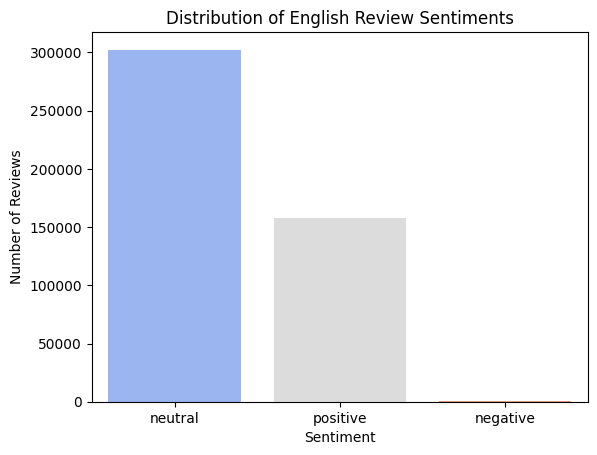

In [ ]:
# Plotting the distribution of sentiments
sns.countplot(x='sentiment', data=english_reviews, palette='coolwarm')
plt.title('Distribution of English Review Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

Now, lets extract the top words from positive and negative reviews

In [ ]:
positive_reviews = english_reviews[english_reviews['sentiment'] == 'positive']['cleaned_comments']
negative_reviews = english_reviews[english_reviews['sentiment'] == 'negative']['cleaned_comments']


In [ ]:
top_positive_words = get_top_words(positive_reviews)
top_negative_words = get_top_words(negative_reviews)

# Display the top words for each sentiment
print("Top positive words:", top_positive_words)
print("Top negative words:", top_negative_words)

Top positive words: [('great', 125028), ('place', 77671), ('stay', 63696), ('location', 62235), ('host', 43526), ('clean', 32899), ('nice', 27217), ('perfect', 26959), ('good', 22053), ('toronto', 20409), ('recommend', 18818), ('amazing', 18358), ('beautiful', 17695), ('apartment', 16830), ('wonderful', 15345), ('close', 14037), ('easy', 13971), ('excellent', 13771), ('comfortable', 13446), ('view', 12099)]
Top negative words: [('place', 71), ('bad', 60), ('stay', 31), ('dirty', 31), ('terrible', 29), ('worst', 28), ('disappointed', 26), ('room', 24), ('experience', 24), ('host', 21), ('airbnb', 15), ('recommend', 15), ('bed', 14), ('location', 13), ('disgusting', 13), ('like', 12), ('cold', 12), ('house', 11), ('time', 10), ('apartment', 10)]


<ipython-input-12-1f283fa06d4a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


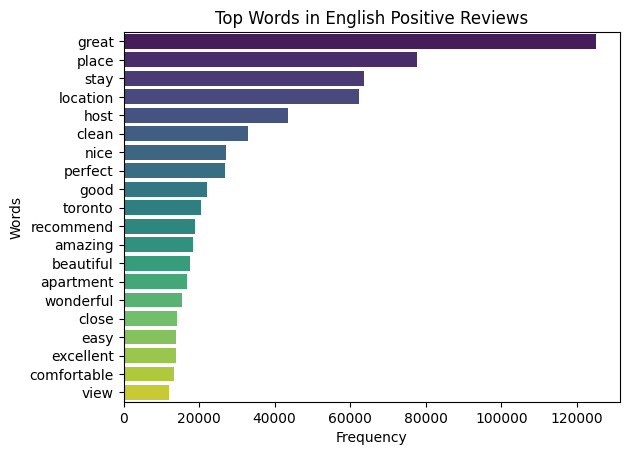

<ipython-input-12-1f283fa06d4a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


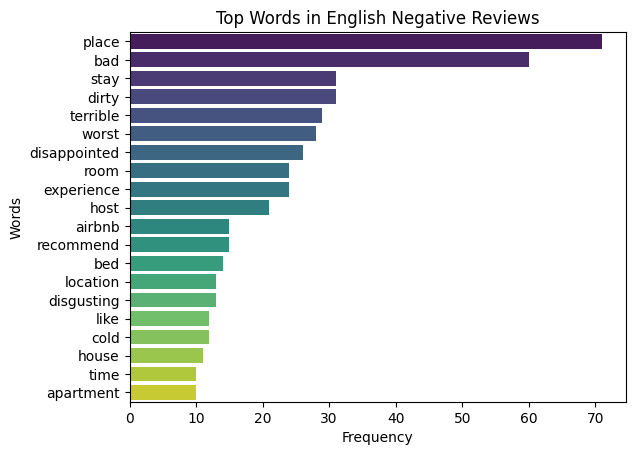

In [ ]:
# Plot top words for English positive reviews
plot_top_words(top_positive_words, 'Top Words in English Positive Reviews')

# Plot top words for English negative reviews
plot_top_words(top_negative_words, 'Top Words in English Negative Reviews')


Lets now build a machine learning model

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

We will convert the categorical polarity scores (positive, neutral, negative) into numerical label versions

In [ ]:
sentiment_mapping={'positive': 1, 'neutral': 0, 'negative': -1}
english_reviews['sentiment_label'] = english_reviews['sentiment'].map(sentiment_mapping)

Lets prepare the dataset for modeling

In [ ]:
X = english_reviews['comments'].fillna('')
y = english_reviews['sentiment_label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the first few entries of X-train and y_train
print("First few entries in X_train: \n", X_train.head())
print("\n First few labels in y_train: \n", y_train[:5])

First few entries in X_train: 
 204946    Ed  is a great host. His place is very cozy an...
128153        훌륭한 장소. CN tower와 Ontario lake를 직접 볼 수 있는 42층
348780       Great little spot! We really enjoyed our stay!
258115                                         Great place!
510011    Great place for an extended family to stay.  T...
Name: comments, dtype: object

 First few labels in y_train: 
 [0 0 0 1 1]


Now we vectorize the text. We apply TF-IDF vectorization to the training data and check the shape of the resulting matrix


In [ ]:

# Initialize and fit the TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#output the shape of the resulting TF-IDF matrices
print("Shape of X-train_tfidf: ", X_train_tfidf.shape)
print("Shape of X_test_tfidf: ", X_test_tfidf.shape)

Shape of X-train_tfidf:  (322061, 5000)
Shape of X_test_tfidf:  (138027, 5000)


Now lets train the model. We will train the logistic regression model and output the first few predictions to understand the model's initial behavior

In [ ]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)



Sample predictions:  [0 0 1 0 0]


In [ ]:
# Assume you are interested in the first five entries for simplicity
# These correspond to the first five rows of the TF-IDF transformed matrix directly after the split
sample_predictions = model.predict(X_test_tfidf[:5])  # Direct positional indexing

# Now, extract the actual sentiments and texts correctly
# The actual sentiments should align with how you've extracted your sample text
sample_texts = X_test.head(5).tolist()  # Convert the first five test samples to a list for easy viewing
sample_actuals = y_test[:5]  # Actual sentiments for the first five test samples, assuming y_test is correctly ordered

# Print out the review texts, predicted sentiments, and actual sentiments
for text, prediction, actual in zip(sample_texts, sample_predictions, sample_actuals):
    print(f"Review: {text}")
    print(f"Predicted sentiment: {'positive' if prediction == 1 else 'negative' if prediction == -1 else 'neutral'}")
    print(f"Actual sentiment: {'positive' if actual == 1 else 'negative' if actual == -1 else 'neutral'}\n")


Review: Liliana and Laurie made checking in and out of the place very convenient.
Predicted sentiment: neutral
Actual sentiment: neutral

Review: The location is in the heart of Yorkville and the view from the apartment is beautiful. They stated they have a sofa bed in the description, but there wasn’t one available. The place was way too tight and they had a lot of extra unnecessary furniture. We checked in with 3 guys but the place is only good for 1 person (unless you’re sharing a bed, then it’s good for 2). The shower is super small and splashes water everywhere. The sofa had stains all over it, and the place wasn’t properly cleaned. They didn’t have extra blankets, pillows, etc… There was still things in the washer when we arrived. When we wanted to check out, we had to drop off the key at a different location, but they made us walk all the way back to the apartment and drop it off there. I personally wouldn’t recommend this place.
Predicted sentiment: neutral
Actual sentiment: ne

Now we evaluate the model. We use the whole test set. We'll print out the accuracy and the classification report.

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# determine which labels are present
unique_labels= np.unique(np.concatenate((y_test, y_pred)))
print("Unique labels in combined actual and predicted: ", unique_labels)

# print the classification report based on the labels present
actual_target_names = ['negative', 'neutral', 'positive']
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=actual_target_names, labels=unique_labels))


NameError: name 'model' is not defined